In [6]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

##Below line tells the IDE to draw the plots immediately after the current cell
%matplotlib inline  
matplotlib.rcParams['figure.figsize']=(12,8) # Adjusts the configuration of the plots that is created


#Importing the data
df=pd.read_csv(r'C:\Users\HP\Downloads\movies.csv.zip')


In [7]:
#Reading the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [8]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
#Filling null values with their correspondin mean

avg_score=df.score.mean()
avg_score

6.390410958904098

In [10]:
df.score = df.score.fillna(avg_score)
df.score = df.score.round(decimals=1)

In [11]:
avg_votes=df.votes.mean()
avg_votes

88108.50476190477

In [12]:
df.votes= df.votes.fillna(avg_votes)
df.votes = df.votes.round(decimals=1)

In [13]:
avg_budget=df.budget.mean()
avg_budget

35589876.192650534

In [14]:
df.budget= df.budget.fillna(avg_budget)
df.budget = df.budget.round(decimals=1)

In [15]:
avg_gross=df.gross.mean()
avg_gross

78500541.01778312

In [16]:
df.gross= df.gross.fillna(avg_votes)
df.gross = df.gross.round(decimals=1)

In [17]:
avg_runtime=df.runtime.mean()
avg_runtime

107.2616127348643

In [18]:
df.runtime= df.runtime.fillna(avg_votes)
df.runtime = df.runtime.round(decimals=1)

In [19]:
avg_rating=df.rating.mode()
df['rating'] = df['rating'].fillna('R')

In [20]:
#Filling null values with their correspondin mode

avg_released = df.released.mode()
avg_released

0    February 14, 1986 (United States)
1         May 17, 2019 (United States)
2      October 4, 1991 (United States)
Name: released, dtype: object

In [21]:
df['released'] = df['released'].fillna('February 14, 1986 (United States)')

In [22]:
avg_star=df.star.mode()
avg_star

0    Nicolas Cage
Name: star, dtype: object

In [23]:
df.star=df.star.fillna('Nicolas Cage')

In [24]:
avg_country=df.country.mode()
avg_country

0    United States
Name: country, dtype: object

In [25]:
df.country=df.country.fillna('United States')

In [26]:
avg_writer=df.writer.mode()
avg_writer

0    Woody Allen
Name: writer, dtype: object

In [27]:
df.writer=df.writer.fillna('Woody Allen')

In [28]:
avg_company=df.company.mode()
avg_company

0    Universal Pictures
Name: company, dtype: object

In [29]:
df.company=df.company.fillna('Universal Pictures')

In [30]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [31]:
#Data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
#Changing the data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')


In [33]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3818                        Love, Honor and Obey          R  Comedy  2000   
7625                            The Untold Story          R  Comedy  2019   
7580                         Run with the Hunted  Not Rated   Crime  2019   
2417                                    Madadayo          R   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
...                                 ...    ...      ...              ...   
3818   February 9, 2001 (United States)    6.5     5200  Dominic Anciano   
7625   January 11, 2019 (United States)    5.7      320    Shane Stanley   
7580      June 26, 2020 (United States)    5.2      735        John Swab   
2417             April 17, 1993 (Japan)    7.3     5100   Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800     George Huang   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
3818     Dominic Anciano        Sadie Frost  United Kingdom   35589876   
7625         Lee Stanley        Miko Hughes   United States   35589876   
7580           John Swab        Ron Perlman   United States   35589876   
2417        Ishirô Honda   Tatsuo Matsumura           Japan   11900000   
3203           Andy Burg       Will Friedle   United States   15000000   

           gross                                 company  runtime  
5445  2847246203                   Twentieth Century Fox      162  
7445  2797501328                          Marvel Studios      181  
3045  2201647264                   Twentieth Century Fox      194  
6663  2069521700                               Lucasfilm      138  
7244  2048359754                          Marvel Studios      149  
...          ...                                     ...      ...  
3818        1400  British Broadcasting Corporation (BBC)      103  
7625         790               Visual Arts Entertainment      104  
7580         682                           Roxwell Films       93  
2417         596          DENTSU Music And Entertainment      134  
3203         309                                Daybreak       85  

[7668 rows x 15 columns]

In [36]:
#Removing the country in released column
df['new_released'] = df['released']
df['new_released'] = df['new_released'].astype(str)
df['new_released'] = df['new_released'].str.replace(r'\s*\([^)]*\)', '',regex=True)
df['released'] = df['new_released']

In [37]:
#Changing the date format
df['new_released'] = pd.to_datetime(df['new_released'], errors='coerce')
df['new_released'] = df['new_released'].dt.strftime('%Y-%m-%d')
df['released'] = df['new_released']

In [38]:
#Correcting the year
df['year_correct'] = df['released'].astype(str).str[:4]
df['year'] = df['year_correct']

In [39]:
df = df.sort_values(['gross'],inplace = False, ascending = False)

In [40]:
df.drop('new_released', axis=1, inplace=True)
df.drop('year_correct', axis=1, inplace=True)

In [41]:
df

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3818                        Love, Honor and Obey          R  Comedy  2001   
7625                            The Untold Story          R  Comedy  2019   
7580                         Run with the Hunted  Not Rated   Crime  2020   
2417                                    Madadayo          R   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

        released  score    votes         director              writer  \
5445  2009-12-18    7.8  1100000    James Cameron       James Cameron   
7445  2019-04-26    8.4   903000    Anthony Russo  Christopher Markus   
3045  1997-12-19    7.8  1100000    James Cameron       James Cameron   
6663  2015-12-18    7.8   876000      J.J. Abrams     Lawrence Kasdan   
7244  2018-04-27    8.4   897000    Anthony Russo  Christopher Markus   
...          ...    ...      ...              ...                 ...   
3818  2001-02-09    6.5     5200  Dominic Anciano     Dominic Anciano   
7625  2019-01-11    5.7      320    Shane Stanley         Lee Stanley   
7580  2020-06-26    5.2      735        John Swab           John Swab   
2417  1993-04-17    7.3     5100   Akira Kurosawa        Ishirô Honda   
3203  1997-10-01    5.7     5800     George Huang           Andy Burg   

                   star         country     budget       gross  \
5445    Sam Worthington   United States  237000000  2847246203   
7445  Robert Downey Jr.   United States  356000000  2797501328   
3045  Leonardo DiCaprio   United States  200000000  2201647264   
6663       Daisy Ridley   United States  245000000  2069521700   
7244  Robert Downey Jr.   United States  321000000  2048359754   
...                 ...             ...        ...         ...   
3818        Sadie Frost  United Kingdom   35589876        1400   
7625        Miko Hughes   United States   35589876         790   
7580        Ron Perlman   United States   35589876         682   
2417   Tatsuo Matsumura           Japan   11900000         596   
3203       Will Friedle   United States   15000000         309   

                                     company  runtime  
5445                   Twentieth Century Fox      162  
7445                          Marvel Studios      181  
3045                   Twentieth Century Fox      194  
6663                               Lucasfilm      138  
7244                          Marvel Studios      149  
...                                      ...      ...  
3818  British Broadcasting Corporation (BBC)      103  
7625               Visual Arts Entertainment      104  
7580                           Roxwell Films       93  
2417          DENTSU Music And Entertainment      134  
3203                                Daybreak       85  

[7668 rows x 15 columns]

In [42]:
pd.set_option('display.max_rows',None)

In [57]:
#Removing duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)

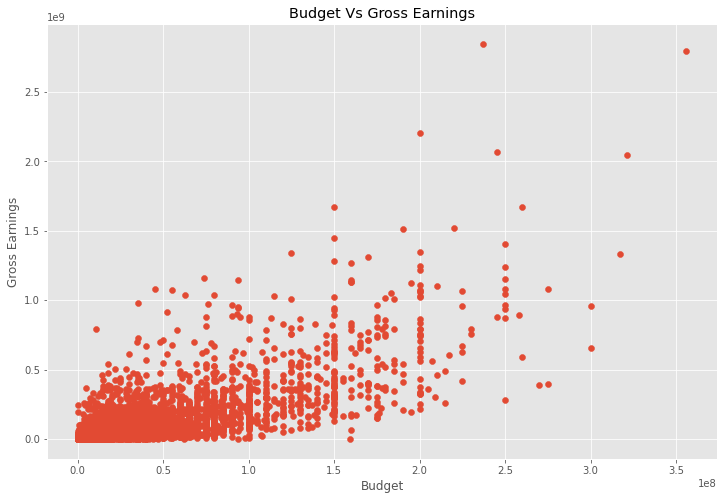

In [44]:
#Scatter Plot with budget vs gross

plt.scatter(x = df['budget'] , y = df['gross'])
plt.title("Budget Vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

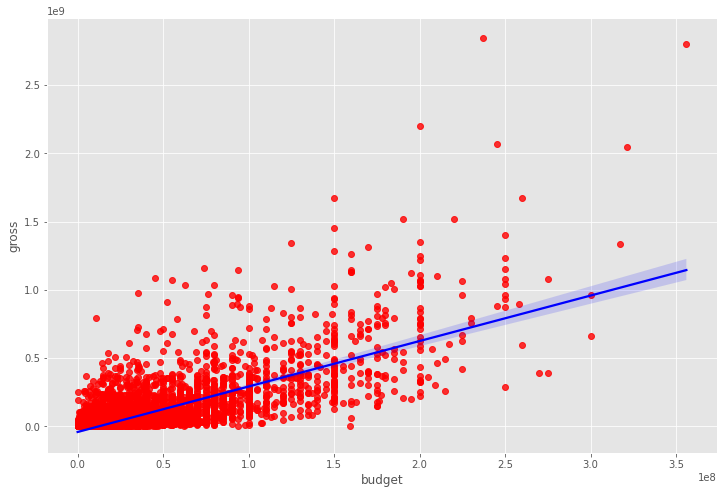

In [45]:
#Ploting with budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [46]:
#Looking at correlation
#Correlation works only on numeric variables
#Different methods = pearson, kendall, spearman. By default, pearson is used
df.corr(method = 'pearson')

score     votes    budget     gross   runtime
score    1.000000  0.409182  0.064537  0.186379 -0.014951
votes    0.409182  1.000000  0.421007  0.632805 -0.001144
budget   0.064537  0.421007  1.000000  0.712682 -0.002612
gross    0.186379  0.632805  0.712682  1.000000 -0.007057
runtime -0.014951 -0.001144 -0.002612 -0.007057  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

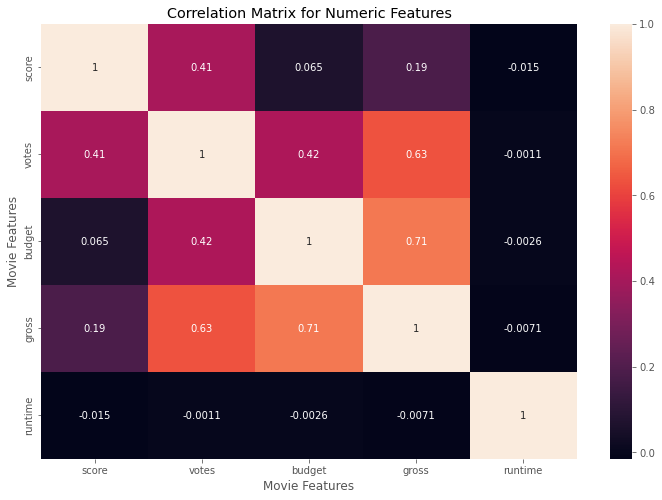

In [47]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show

In [48]:
#Making all of them numerical

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0    29      2103    7.8  1100000      1155    1778   
7445   535       5      0    39      2862    8.4   903000       162     743   
3045  6896       5      6    17      1220    7.8  1100000      1155    1778   
6663  5144       5      0    35      2606    7.8   876000      1125    2550   
7244   536       5      0    38      2777    8.4   897000       162     743   
7480  6194       4      2    39      2885    6.9   222000      1455    1919   
6653  2969       5      0    35      2562    7.0   593000       517    3568   
6043  5502       5      0    32      2297    8.0  1300000      1517    2314   
6646  2145       5      0    35      2549    7.1   370000      1189     706   
7494  2131       4      2    39      2913    6.8   148000       432    1950   
6644   534       5      0    35      2554    7.3   777000      1517    2314   
7247   791       5      0    38      2764    7.3   661000      2457    3795   
5845  2407       5      1    31      2234    8.1   790000       679    4052   
7075  5145       5      0    37      2751    7.0   581000      2282    3518   
7271  2970       5      0    38      2790    6.2   277000      1121    1093   
6262  2130       4      2    33      2437    7.4   585000       432    1950   
7072   657       4      7    37      2695    7.1   283000       250    4000   
7281  2760       4      2    38      2789    7.6   263000       303     491   
7055  5833       5      0    37      2701    6.6   214000       835    1431   
6244  2823       5      0    33      2385    7.1   779000      2543    1174   
6688  3622       4      2    35      2568    6.4   218000      1639     534   
6846  1056       5      0    36      2635    7.8   694000       162     743   
7250   474       5      0    38      2832    6.9   404000      1189     990   
4245  6221       5      0    23      1668    8.9  1700000      2193    1745   
7458  5084       5      0    39      2882    7.5   359000      1463     704   
7456  1061       5      0    39      2851    6.8   478000       147     255   
5878  6968       5      0    31      2229    6.2   390000      1886    1237   
6059  4951       5      0    32      2345    7.7   642000      2476    3125   
6494  6967       5      0    34      2481    5.6   302000      1886    1237   
2448  6194       1      2    14       967    8.5   970000      2415    1702   
6047  5726       5      0    32      2314    8.4  1600000       483    2265   
7463  5141       5      0    39      2917    6.5   394000      1125     714   
7450  2930       6      5    39      2906    8.4  1000000      2767    4248   
7488  6949       1      2    39      2878    7.7   217000      1509    2158   
5685  6948       1      2    30      2143    8.2   776000      1678    2158   
4852  4258       5      0    26      1850    7.3   668000       996    4147   
6869  4616       5      0    36      2678    7.8   572000       912     717   
7481   290       4      1    39      2872    6.9   239000      1031    2078   
5860  4261       5      0    31      2221    6.6   492000      2341    4147   
7140  1552       4      2    37      2719    6.3   119000      1639     758   
2245  2967       5      0    13       889    8.1   894000      2660    2931   
6908  1978       4      2    36      2643    7.3   250000       124     215   
3451  5138       4      0    19      1323    6.5   748000       963    1472   
5667   300       4      1    30      2116    6.4   392000      2745    2607   
6863  7504       4      2    36      2621    8.0   450000       362     576   
6045  6001       5      1    32      2350    7.8   773000      2193    1359   
3843  2412       4      1    21      1519    7.6   685000       435    1741   
5243  5725       5      0    28      1997    9.0  2400000       483    2265   
5652  2406       5      1    30      2179    7.7   495000       679    4052   
6311  1551       4      2    33      2401    7.3   37700

<function matplotlib.pyplot.show(close=None, block=None)>

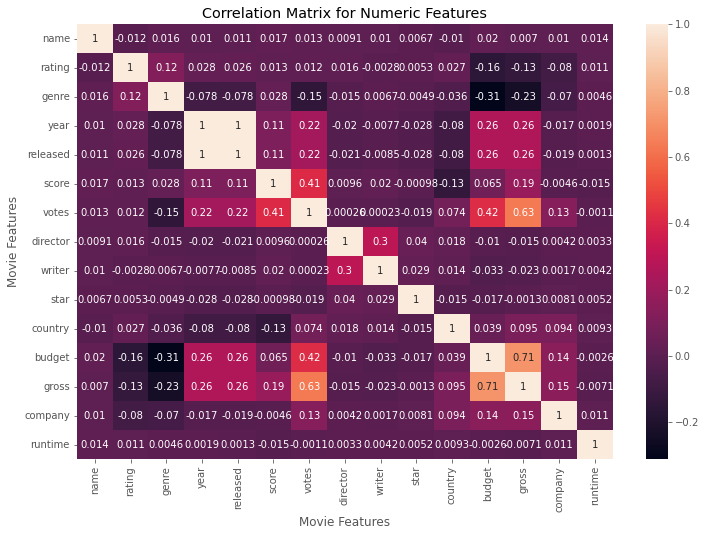

In [49]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show

In [50]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.012441  0.016355  0.010379  0.010934  0.017096   
rating   -0.012441  1.000000  0.123465  0.028017  0.026340  0.013248   
genre     0.016355  0.123465  1.000000 -0.078120 -0.077719  0.027959   
year      0.010379  0.028017 -0.078120  1.000000  0.999342  0.106151   
released  0.010934  0.026340 -0.077719  0.999342  1.000000  0.107496   
score     0.017096  0.013248  0.027959  0.106151  0.107496  1.000000   
votes     0.013086  0.012378 -0.145276  0.218229  0.217982  0.409182   
director  0.009079  0.016255 -0.015258 -0.020399 -0.021279  0.009557   
writer    0.010018 -0.002795  0.006746 -0.007694 -0.008465  0.019790   
star      0.006749  0.005314 -0.004856 -0.028117 -0.027836 -0.000981   
country  -0.010425  0.026930 -0.035896 -0.080221 -0.080423 -0.134575   
budget    0.020368 -0.156544 -0.310566  0.259488  0.260153  0.064537   
gross     0.006987 -0.130522 -0.234293  0.255111  0.256916  0.186379   
company   0.010369 -0.079626 -0.070013 -0.017363 -0.018593 -0.004592   
runtime   0.014007  0.011411  0.004619  0.001892  0.001293 -0.014951   

             votes  director    writer      star   country    budget  \
name      0.013086  0.009079  0.010018  0.006749 -0.010425  0.020368   
rating    0.012378  0.016255 -0.002795  0.005314  0.026930 -0.156544   
genre    -0.145276 -0.015258  0.006746 -0.004856 -0.035896 -0.310566   
year      0.218229 -0.020399 -0.007694 -0.028117 -0.080221  0.259488   
released  0.217982 -0.021279 -0.008465 -0.027836 -0.080423  0.260153   
score     0.409182  0.009557  0.019790 -0.000981 -0.134575  0.064537   
votes     1.000000  0.000260  0.000232 -0.019452  0.073582  0.421007   
director  0.000260  1.000000  0.299512  0.039715  0.017926 -0.010364   
writer    0.000232  0.299512  1.000000  0.028745  0.014409 -0.033217   
star     -0.019452  0.039715  0.028745  1.000000 -0.014749 -0.016952   
country   0.073582  0.017926  0.014409 -0.014749  1.000000  0.038620   
budget    0.421007 -0.010364 -0.033217 -0.016952  0.038620  1.000000   
gross     0.632805 -0.014916 -0.022958 -0.001280  0.094835  0.712682   
company   0.130638  0.004250  0.001665  0.008072  0.094210  0.142804   
runtime  -0.001144  0.003302  0.004189  0.005169  0.009286 -0.002612   

             gross   company   runtime  
name      0.006987  0.010369  0.014007  
rating   -0.130522 -0.079626  0.011411  
genre    -0.234293 -0.070013  0.004619  
year      0.255111 -0.017363  0.001892  
released  0.256916 -0.018593  0.001293  
score     0.186379 -0.004592 -0.014951  
votes     0.632805  0.130638 -0.001144  
director -0.014916  0.004250  0.003302  
writer   -0.022958  0.001665  0.004189  
star     -0.001280  0.008072  0.005169  
country   0.094835  0.094210  0.009286  
budget    0.712682  0.142804 -0.002612  
gross     1.000000  0.153969 -0.007057  
company   0.153969  1.000000  0.010504  
runtime  -0.007057  0.010504  1.000000

In [51]:
#Unstacking

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.012441
          genre       0.016355
          year        0.010379
          released    0.010934
          score       0.017096
          votes       0.013086
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020368
          gross       0.006987
          company     0.010369
          runtime     0.014007
rating    name       -0.012441
          rating      1.000000
          genre       0.123465
          year        0.028017
          released    0.026340
          score       0.013248
          votes       0.012378
          director    0.016255
          writer     -0.002795
          star        0.005314
          country     0.026930
          budget     -0.156544
          gross      -0.130522
          company    -0.079626
          runtime     0.011411
genre     name        0.016355
          rating      0.123465
        

In [53]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.310566
genre     budget     -0.310566
          gross      -0.234293
gross     genre      -0.234293
budget    rating     -0.156544
rating    budget     -0.156544
votes     genre      -0.145276
genre     votes      -0.145276
country   score      -0.134575
score     country    -0.134575
rating    gross      -0.130522
gross     rating     -0.130522
country   released   -0.080423
released  country    -0.080423
year      country    -0.080221
country   year       -0.080221
company   rating     -0.079626
rating    company    -0.079626
genre     year       -0.078120
year      genre      -0.078120
released  genre      -0.077719
genre     released   -0.077719
          company    -0.070013
company   genre      -0.070013
country   genre      -0.035896
genre     country    -0.035896
writer    budget     -0.033217
budget    writer     -0.033217
year      star       -0.028117
star      year       -0.028117
          released   -0.027836
released  star       -0.027836
gross   

In [56]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.632805
votes     gross       0.632805
budget    gross       0.712682
gross     budget      0.712682
year      released    0.999342
released  year        0.999342
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64